
## (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
    

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



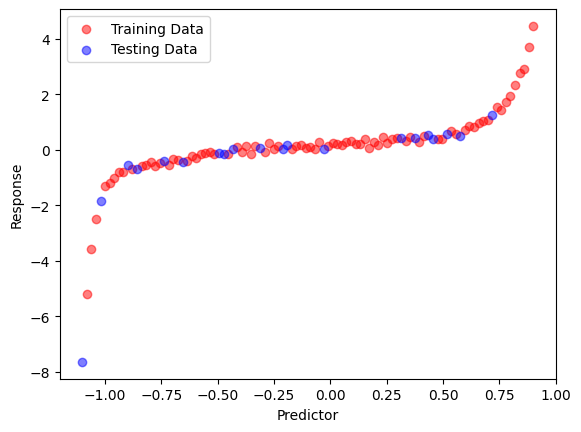

In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

# # Splitting data into training and testing sets(80:20 is kept for now)
predictor_train, predictor_test, response_train, response_test = train_test_split(predictor, response, test_size=0.2, random_state=42)
# plt.plot(predictor_train, response_train, 'r+', label='Training Data')
# plt.plot(predictor_test, response_test, 'bo', label='Testing Data')
# plt.xlabel('Predictor')
# plt.ylabel('Response')
# plt.title('Sampled Data Points (Train-Test Split)')
# plt.legend()
# plt.show()

data = np.column_stack((predictor_train, response_train))
sorted_indices = np.argsort(data[:, 0])
sorted_data = data[sorted_indices]
predictor_train = sorted_data[:, 0]
response_train = sorted_data[:, 1]

data1 = np.column_stack((predictor_test, response_test))
sorted_indices1 = np.argsort(data1[:, 0])
sorted_data1 = data1[sorted_indices1]
predictor_test = sorted_data1[:, 0]
response_test = sorted_data1[:, 1]

plt.scatter(predictor_train, response_train, color='red', alpha=0.5, label='Training Data')
plt.scatter(predictor_test, response_test, color='blue', alpha=0.5, label='Testing Data')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.legend()
plt.show()





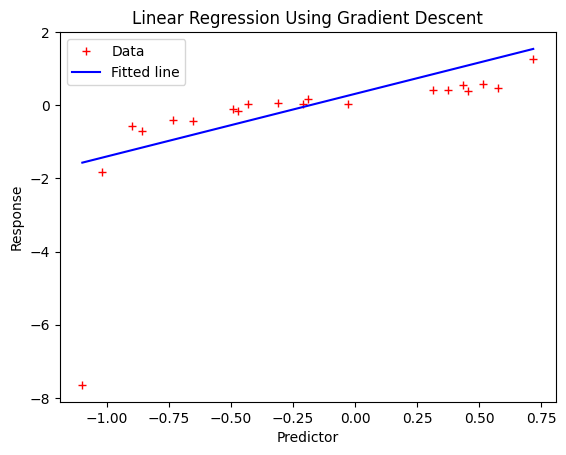

Mean Squared Error: 1.0297337737552226
R-squared: 0.34846973234413126


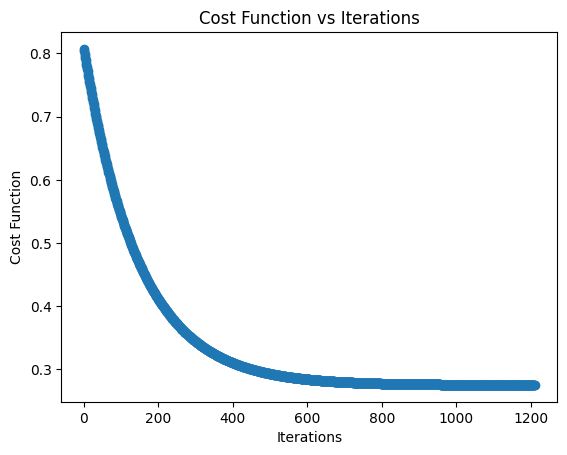

In [ ]:
def cost_function(prediction,target):
  m=target.shape[0]
  return (1/(2*m))*np.sum((prediction-target)**2)

def mean_squared_error(prediction, target):
    m = target.shape[0]
    return np.sum((prediction - target)**2) / (2*m)

def r_squared(prediction, target):
    ssr = np.sum((prediction - target)**2)
    sst = np.sum((target - np.mean(target))**2)
    return 1 - (ssr / sst)

def gradient_descent(x,y,learning_rate,convergence):
  b0=b1=0
  costs=[]
  m=y.shape[0]
  prev_cost=float('inf')
  it=0

  while True:
    y_pred=b1*x+b0
    gradient0=(1/m)*np.sum(y_pred-y)
    gradient1=(1/m)*np.sum((y_pred-y)*x)
    b0=b0-learning_rate*gradient0
    b1=b1-learning_rate*gradient1
    cost=cost_function(y_pred,y)
    costs.append(cost)
    if(abs(prev_cost-cost)<=convergence):
      break
    prev_cost=cost
    it+=1

  return b0,b1,costs


learning_rate=0.01
convergence=1e-6
b0,b1,costs=gradient_descent(predictor_train,response_train,learning_rate,convergence)

#Original plot
plt.plot(predictor_test, response_test, 'r+',label='Data')
plt.plot(predictor_test,b0+b1*predictor_test,'b-',label='Fitted line')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression Using Gradient Descent')
plt.legend()
plt.show()

# Compute predictions on the test set
Y_pred = b0 + b1 * predictor_test
mse_lrReg = mean_squared_error(Y_pred, response_test)
r2_lrReg = r_squared(Y_pred, response_test)
print(f'Mean Squared Error: {mse_lrReg}')
print(f'R-squared: {r2_lrReg}')

#Cost function vs iterations of gradient descent for checking convergence of gradient descent
plt.plot(range(len(costs)), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations')
plt.show()




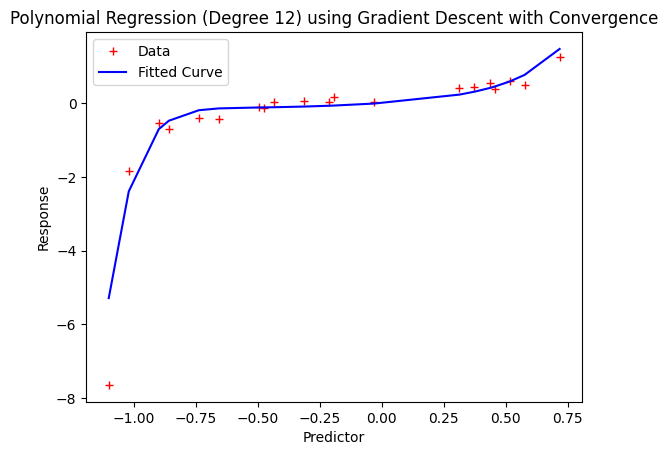

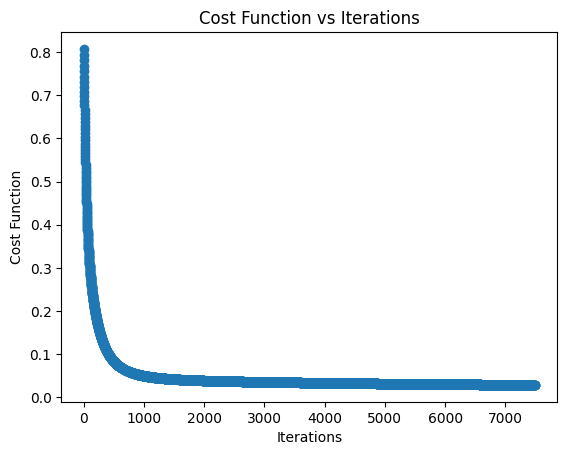

In [ ]:
def polynomial_regression(x, y, degree, learning_rate, convergence):
    m=y.shape[0]
    X_poly = np.column_stack([x**i for i in range(1, degree + 1)])
    beta = np.zeros(degree) #parameter or coefficient
    costs=[]
    prev_cost = float('inf')
    while True:
        y_pred = np.dot(X_poly, beta)
        error = y_pred - y

        gradient = (1/m) * np.dot(X_poly.T, error)
        beta = beta - learning_rate * gradient

        cost = (1/(2*m)) * np.sum(error**2)
        costs.append(cost)
        if abs(prev_cost - cost) < convergence:
            break

        prev_cost = cost

    return beta,costs


def predict_poly(x, beta):
    y_pred = np.zeros_like(x)
    for i in range(len(beta)):
        y_pred += beta[i] * x**(i + 1)

    return y_pred



degree = 12
learning_rate = 0.01
convergence = 1e-6

beta,costs = polynomial_regression(predictor_train, response_train, degree, learning_rate, convergence)
y_pred = predict_poly(predictor_test, beta)

# temp=sorted(predictor_test)

plt.plot(predictor_test, response_test, 'r+', label='Data')
plt.plot(predictor_test, y_pred, 'b-', label='Fitted Curve')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title(f'Polynomial Regression (Degree {degree}) using Gradient Descent with Convergence')
plt.legend()
plt.show()
# plt.scatter(predictor_test, response_test, color='red', label='Testing Data')
# plt.scatter(predictor_test, y_pred, color='blue', label='Fitted Curve')
# plt.xlabel('Predictor')
# plt.ylabel('Response')
# plt.title(f'Polynomial Regression (Degree {degree}) using Gradient Descent with Convergence')
# plt.legend()
# plt.show()


#Cost function vs iterations of gradient descent for checking convergence of gradient descent
plt.plot(range(len(costs)), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations')
plt.show()


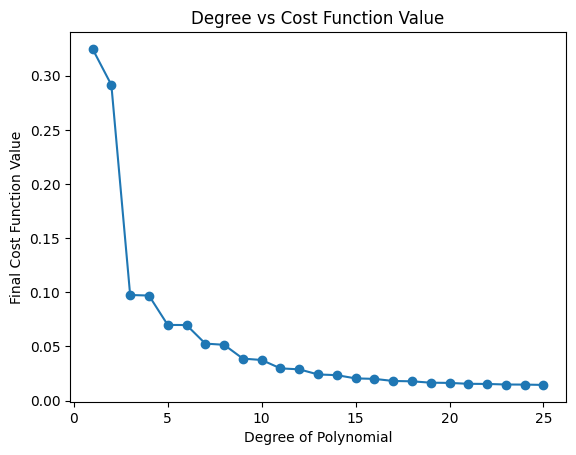

Best Degree: 25
[0.32478835969018693, 0.2915297299225911, 0.09747174077824872, 0.09696270057365504, 0.06981574272794064, 0.06972595255499502, 0.05257534540629982, 0.05146798299857139, 0.038697986068728894, 0.03743425132085051, 0.029689357922510463, 0.0287978584713419, 0.024063856218097618, 0.023433024561648287, 0.02042978881556286, 0.01998871977273961, 0.018039625277977606, 0.01773646529356887, 0.016461687858265277, 0.016257933917194597, 0.015431430062979002, 0.015302469299476491, 0.014781412333570089, 0.014707670603027051, 0.014399028837425205]


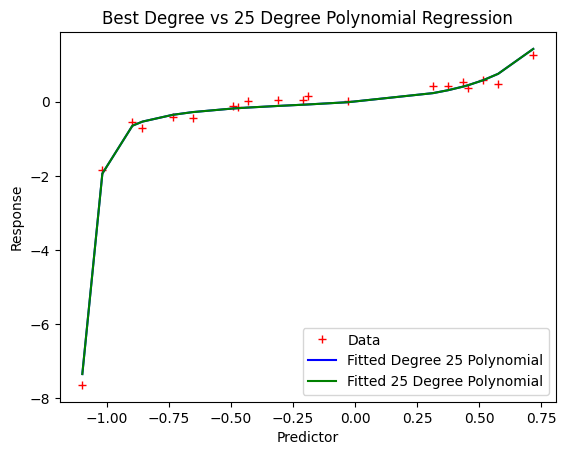

In [ ]:

degrees_to_try = range(1, 26)
coefficients_list = []
costs_list = []

for degree in degrees_to_try:
    beta, costs = polynomial_regression(predictor_train, response_train, degree, learning_rate, convergence)
    coefficients_list.append(beta)
    costs_list.append(costs[-1])

# Plot showing degree vs cost function
plt.plot(degrees_to_try, costs_list, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Final Cost Function Value')
plt.title('Degree vs Cost Function Value')
plt.show()

best_degree = degrees_to_try[np.argmin(costs_list)]
print(f'Best Degree: {best_degree}')

print(costs_list)

beta,costs = polynomial_regression(predictor_train, response_train, 25, learning_rate, convergence)
y_pred25 = predict_poly(predictor_test, beta)


# Plot showing the best degree and the 25 degree polynomial on data points
plt.plot(predictor_test, response_test, 'r+', label='Data')
plt.plot(predictor_test, predict_poly(predictor_test, coefficients_list[best_degree-1]), 'b-', label=f'Fitted Degree {best_degree} Polynomial')
plt.plot(predictor_test, y_pred25, 'g-', label='Fitted 25 Degree Polynomial')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title(f'Best Degree vs 25 Degree Polynomial Regression')
plt.legend()
plt.show()


#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

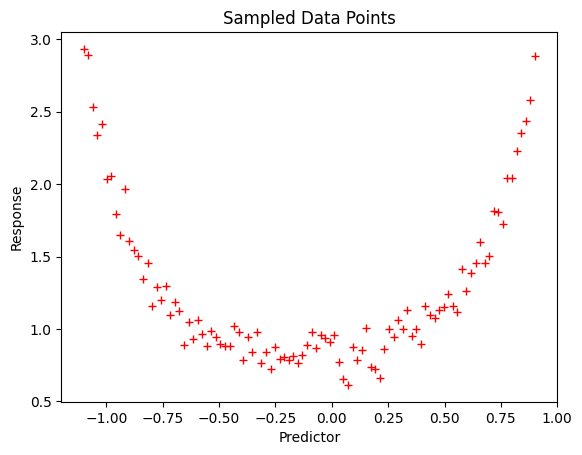

In [ ]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()



# Sorting the values
data_low = np.column_stack((predictor_low, response_low))
sorted_indices_low = np.argsort(data_low[:, 0])
sorted_data_low = data_low[sorted_indices_low]
predictor_low = sorted_data_low[:, 0]
response_low = sorted_data_low[:, 1]

# Splitting data into training and testing sets(80:20 is kept for now)
predictor_train_low, predictor_test_low, response_train_low, response_test_low = train_test_split(predictor_low, response_low, test_size=0.2, random_state=42)

# Sorting training data
data_train_low = np.column_stack((predictor_train_low, response_train_low))
sorted_indices_train_low = np.argsort(data_train_low[:, 0])
sorted_data_train_low = data_train_low[sorted_indices_train_low]
predictor_train_low = sorted_data_train_low[:, 0]
response_train_low = sorted_data_train_low[:, 1]

# Sorting testing data
data_test_low = np.column_stack((predictor_test_low, response_test_low))
sorted_indices_test_low = np.argsort(data_test_low[:, 0])
sorted_data_test_low = data_test_low[sorted_indices_test_low]
predictor_test_low = sorted_data_test_low[:, 0]
response_test_low = sorted_data_test_low[:, 1]

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

Polynomial without Regularization - MSE: 0.14282750105490286  R-squared: 0.06300587129741131
Polynomial with Regularization R1 - MSE: 0.1409667208688248  R-squared: 0.07521318498898832
Polynomial with Regularization R2 - MSE: 0.14821479292738066  R-squared: 0.027663512040012495


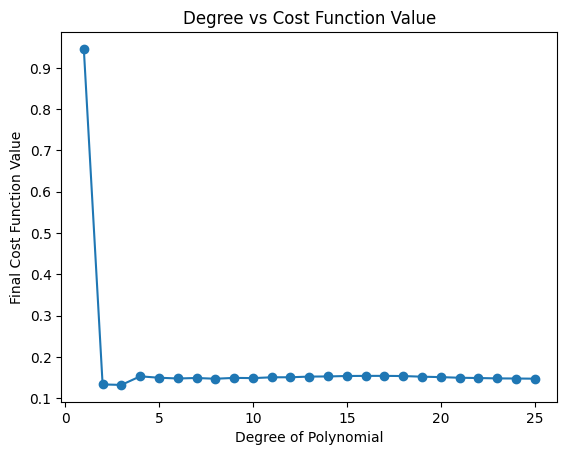

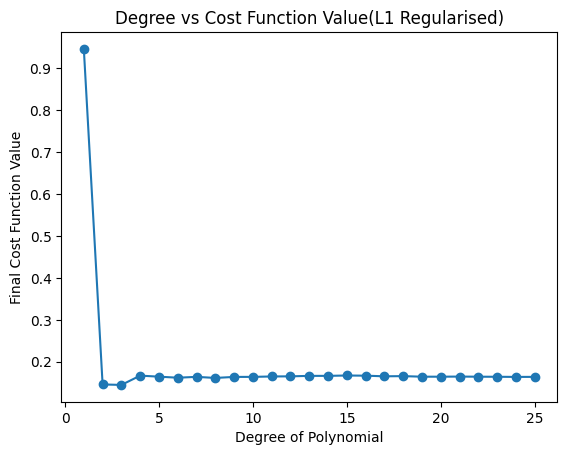

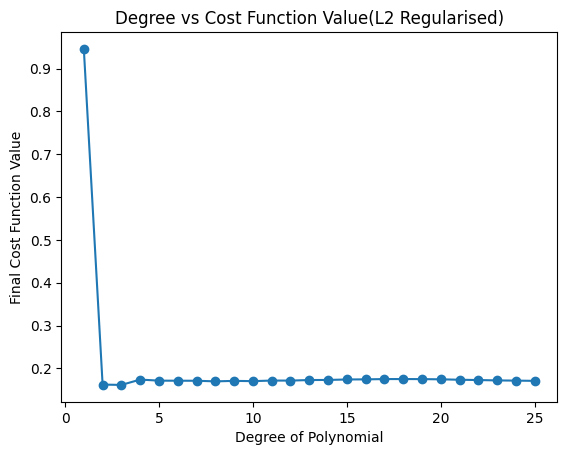

In [ ]:
def l1_regularization(X, y, degree, alpha, learning_rate, convergence):
    m = y.shape[0]
    X_poly = np.column_stack([X**i for i in range(1, degree + 1)])
    beta = np.zeros(degree)
    costs = []
    prev_cost = float('inf')

    while True:
        y_pred = np.dot(X_poly, beta)
        error = y_pred - y

        gradient = (1/m) * np.dot(X_poly.T, error) + (alpha/m) * np.sign(beta)
        beta = beta - learning_rate * gradient

        cost = (1/(2*m)) * np.sum(error**2) + (alpha/m) * np.sum(np.abs(beta))
        costs.append(cost)

        if abs(prev_cost - cost) < convergence:
            break

        prev_cost = cost

    return beta, costs

def l2_regularization(X, y, degree, alpha, learning_rate, convergence):
    m = y.shape[0]
    X_poly = np.column_stack([X**i for i in range(1, degree + 1)])
    beta = np.zeros(degree)
    costs = []
    prev_cost = float('inf')

    while True:
        y_pred = np.dot(X_poly, beta)
        error = y_pred - y

        gradient = (1/m) * np.dot(X_poly.T, error) + (alpha/m) * beta
        beta = beta - learning_rate * gradient

        cost = (1/(2*m)) * np.sum(error**2) + (alpha/m) * np.sum(beta**2)
        costs.append(cost)

        if abs(prev_cost - cost) < convergence:
            break

        prev_cost = cost

    return beta, costs


def mse_and_r2(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r_squared(y_pred, y_true)
    return mse, r2

degree = 12
learning_rate = 0.001
convergence = 1e-6
alpha_l1 = 0.3  # L1 regularization strength
alpha_l2 = 0.3  # L2 regularization strength

# Fitting a polynomial without regularization
beta_poly, costs_poly = polynomial_regression(predictor_train_low, response_train_low, degree, learning_rate, convergence)
y_poly = predict_poly(predictor_test_low, beta_poly)
mse_poly, r2_poly = mse_and_r2(response_test_low, y_poly)
print("Polynomial without Regularization - MSE:", mse_poly, " R-squared:", r2_poly)


# Fitting a polynomial with L1 regularization (Lasso)
beta_l1, costs_l1 = l1_regularization(predictor_train_low, response_train_low, degree, alpha_l1, learning_rate, convergence)
y_l1 = predict_poly(predictor_test_low, beta_l1)
mse_l1, r2_l1 = mse_and_r2(response_test_low, y_l1)
print("Polynomial with Regularization R1 - MSE:", mse_l1, " R-squared:", r2_l1)

# Fitting a polynomial with L2 regularization (Ridge)
beta_l2, costs_l2 = l2_regularization(predictor_train_low, response_train_low, degree, alpha_l2, learning_rate, convergence)
y_l2 = predict_poly(predictor_test_low, beta_l2)
mse_l2, r2_l2 = mse_and_r2(response_test_low, y_l2)
print("Polynomial with Regularization R2 - MSE:", mse_l2, " R-squared:", r2_l2)

# # Plotting the results
# plt.figure(figsize=(12, 8))





# # Plotting the data(final one)
# plt.scatter(predictor_test_low, response_test_low, color='red', label='Data')
# # Plotting the polynomial without regularization
# y_poly = predict_poly(predictor_test_low, beta_poly)
# plt.plot(predictor_test_low, y_poly, label='Polynomial without Regularization')
# # Plotting the polynomial with L1 regularization (Lasso)
# y_l1 = predict_poly(predictor_test_low, beta_l1)
# plt.plot(predictor_test_low, y_l1, label='Polynomial with L1 Regularization (Lasso)')
# # Plotting the polynomial with L2 regularization (Ridge)
# y_l2 = predict_poly(predictor_test_low, beta_l2)
# plt.plot(predictor_test_low, y_l2, label='Polynomial with L2 Regularization (Ridge)')
# plt.xlabel('Predictor')
# plt.ylabel('Response')
# plt.title('Polynomial Regression with Regularization')
# plt.legend()
# plt.show()





degrees_to_try = range(1, 26)
coefficients_list = []
costs_list = []
coefficients_list1 = []
costs_list1 = []
coefficients_list2 = []
costs_list2 = []

for degree in degrees_to_try:
    beta, costs = polynomial_regression(predictor_train_low, response_train_low, degree, learning_rate, convergence)
    beta1, costs1 = l1_regularization(predictor_train_low, response_train_low, degree, alpha_l1, learning_rate, convergence)
    beta2, costs2 = l2_regularization(predictor_train_low, response_train_low, degree, alpha_l2, learning_rate, convergence)
    coefficients_list.append(beta)
    coefficients_list1.append(beta1)
    coefficients_list2.append(beta2)
    costs_list.append(costs[-1])
    costs_list1.append(costs1[-1])
    costs_list2.append(costs2[-1])

# Plot showing degree vs cost function
plt.plot(degrees_to_try, costs_list, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Final Cost Function Value')
plt.title('Degree vs Cost Function Value')
plt.show()


# Plot showing degree vs cost function
plt.plot(degrees_to_try, costs_list1, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Final Cost Function Value')
plt.title('Degree vs Cost Function Value(L1 Regularised)')
plt.show()


# Plot showing degree vs cost function
plt.plot(degrees_to_try, costs_list2, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Final Cost Function Value')
plt.title('Degree vs Cost Function Value(L2 Regularised)')
plt.show()





In [ ]:
from tabulate import tabulate

methods = ["Linear Regression", "Polynomial without Regularization", "Polynomial with Regularization R1 (L1)", "Polynomial with Regularization R2 (L2)"]
mse_values = [mse_lrReg, mse_poly, mse_l1, mse_l2]
r_squared_values = [r2_lrReg, r2_poly, r2_l1, r2_l2]

# Creating a DataFrame
result_df = pd.DataFrame({
    'Method': methods,
    'MSE': mse_values,
    'R-squared': r_squared_values
})

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+----------------------------------------+---------------------+----------------------+
|                 Method                 |         MSE         |      R-squared       |
+----------------------------------------+---------------------+----------------------+
|           Linear Regression            | 1.0297337737552226  | 0.34846973234413126  |
|   Polynomial without Regularization    | 0.14282750105490286 | 0.06300587129741131  |
| Polynomial with Regularization R1 (L1) | 0.1409667208688248  | 0.07521318498898832  |
| Polynomial with Regularization R2 (L2) | 0.14821479292738066 | 0.027663512040012495 |
+----------------------------------------+---------------------+----------------------+


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [ ]:


X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y = credit['Balance']

# Feature scaling as values are quite diff
X = (X - X.mean()) / X.std()

# Adding column for intercept(b0)
X['intercept'] = 1

X = X.values
Y = Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def gradient_descent(X, Y, learning_rate=0.001, convergence_threshold=1e-10):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    previous_cost = float('inf')

    while True:
        predictions = np.dot(X, weights)
        error = predictions - Y
        gradient = (1/num_samples) * np.dot(X.T, error)
        weights = weights - learning_rate * gradient
        cost = np.mean(error**2)
        if abs(previous_cost - cost) < convergence_threshold:
            break
        previous_cost = cost

    return weights


weights = gradient_descent(X_train, Y_train)

def predict(X, weights):
    return np.dot(X, weights)


Y_pred = predict(X_test, weights)

# Calculating error metrics
m=Y_pred.shape[0]
mse = (np.mean((Y_pred - Y_test)**2))
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# # Plot scatter plot for both actual and predicted values
# plt.scatter(range(len(Y_test)), Y_test, label='Actual Values', alpha=0.7)
# plt.scatter(range(len(Y_test)), Y_pred, label='Predicted Values', alpha=0.7)
# plt.xlabel('Data Points')
# plt.ylabel('Balance')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()


Mean Squared Error: 29863.518605415324
Root Mean Squared Error: 172.81064378508438
R-squared: 0.8212553107305358


In [ ]:
# Calculating normalized feature importance based on weights
normalized_weights = weights[:-1] / np.linalg.norm(weights[:-1])  # Excluding the intercept term and dividing by norm or length to normalize
feature_importance = dict(zip(['Income', 'Limit', 'Rating', 'Cards', 'Age'], normalized_weights))

# Displaying feature importance
print("Feature Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

print("According to the feature importance we conclude that Education is the least important feature.")


# X_new = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
# Y_new = credit['Balance']

# # Feature scaling as values are quite diff
# X_new = (X_new - X_new.mean()) / X_new.std()

# # Adding column for intercept(b0)
# X_new['intercept'] = 1

# X_new = X_new.values
# Y_new = Y_new.values

# X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

# def gradient_descent(X_new, Y_new, learning_rate=0.001, convergence_threshold=1e-10):
#     num_samples, num_features = X_new.shape
#     weights = np.zeros(num_features)
#     previous_cost = float('inf')

#     while True:
#         predictions = np.dot(X_new, weights)
#         error = predictions - Y_new
#         gradient = (1/num_samples) * np.dot(X_new.T, error)
#         weights = weights - learning_rate * gradient
#         cost = np.mean(error**2)
#         if abs(previous_cost - cost) < convergence_threshold:
#             break
#         previous_cost = cost

#     return weights


# weights = gradient_descent(X_new_train, Y_new_train)

# # Function to make predictions
# def predict(X_new, weights):
#     return np.dot(X_new, weights)


# Y_pred_new = predict(X_new_test, weights)

# # Calculating error metrics
# m_new=Y_pred_new.shape[0]
# mse_new = (np.mean((Y_pred_new - Y_new_test)**2))
# rmse_new = np.sqrt(mse_new)
# r2_new = 1 - (np.sum((Y_new_test - Y_pred_new)**2) / np.sum((Y_new_test - np.mean(Y_new_test))**2))

# print(f'Mean Squared Error: {mse_new}')
# print(f'Root Mean Squared Error: {rmse_new}')
# print(f'R-squared: {r2_new}')

Feature Importance:
Income: -0.5010073274105123
Limit: 0.7586607294194987
Rating: 0.41256541477285363
Cards: 0.04565978849354969
Age: -0.03092765243536935
According to the feature importance we conclude that Education is the least important feature.


In [ ]:
# Select relevant features and target variable
X_original = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y_original = credit['Balance']

# Feature scaling as values are quite different
X_scaled = (X_original - X_original.mean()) / X_original.std()

# Adding column for intercept (b0)
X_scaled['intercept'] = 1

# Adding interaction term for Rating and Age
X_scaled['Rating_Age_Interact'] = X_scaled['Rating'] * X_scaled['Age']

X_values = X_scaled.values
Y_values = Y_original.values

X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42)

def gradient_descent(X, Y, learning_rate=0.001, convergence_threshold=1e-10):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    previous_cost = float('inf')

    while True:
        predictions = np.dot(X, weights)
        error = predictions - Y
        gradient = (1/num_samples) * np.dot(X.T, error)
        weights = weights - learning_rate * gradient
        cost = np.mean(error**2)
        if abs(previous_cost - cost) < convergence_threshold:
            break
        previous_cost = cost

    return weights

weights = gradient_descent(X_train, Y_train)

def predict(X, weights):
    return np.dot(X, weights)

Y_pred = predict(X_test, weights)

# Calculating error metrics
m = Y_pred.shape[0]
mse = (np.mean((Y_pred - Y_test)**2))
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print('Conclusion:-Hence, The Mean Squared Error decreases and R-squared increases after we added a new feature Rating_Age_Interact, multiplying Rating and Age showing the effect of interaction between them.')

Mean Squared Error: 29852.596901378758
Root Mean Squared Error: 172.77904068890635
R-squared: 0.8213206813461054
Conclusion:-Hence, The Mean Squared Error decreases and R-squared increases after we added a new feature Rating_Age_Interact, multiplying Rating and Age showing the effect of interaction between them.


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [ ]:

# Function to normalize the features
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalized_X = (X - mean) / std
    return normalized_X, mean, std

# Function to perform gradient descent
def gradient_descent(X, Y, learning_rate=0.01, convergence_threshold=0.000001, max_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    previous_cost = float('inf')

    for _ in range(max_iterations):
        predictions = np.dot(X, weights)
        error = predictions - Y

        gradient = (1/num_samples) * np.dot(X.T, error)

        weights = weights - learning_rate * gradient

        cost = np.mean(error**2)

        if np.isnan(cost) or cost > 1e10:
            break

        if abs(previous_cost - cost) < convergence_threshold:
            break

        previous_cost = cost

    return weights

data = pd.read_csv('shark_attacks.csv')

X_ice_cream = data[['Year', 'Month', 'Temperature', 'IceCreamSales']]
X_no_ice_cream = data[['Year', 'Month', 'Temperature']]
Y_shark_attacks = data['SharkAttacks']

# Normalize features
X_ice_cream_normalized, _, _ = normalize_features(X_ice_cream)
X_no_ice_cream_normalized, _, _ = normalize_features(X_no_ice_cream)

# Adding a column for the intercept term
X_ice_cream_normalized = np.column_stack((X_ice_cream_normalized, np.ones(X_ice_cream_normalized.shape[0])))
X_no_ice_cream_normalized = np.column_stack((X_no_ice_cream_normalized, np.ones(X_no_ice_cream_normalized.shape[0])))

# Converting DataFrame to NumPy arrays
Y_shark_attacks = Y_shark_attacks.values

X_train_ice_cream, X_test_ice_cream, Y_train, Y_test = train_test_split(X_ice_cream_normalized, Y_shark_attacks, test_size=0.2, random_state=42)
X_train_no_ice_cream, X_test_no_ice_cream = train_test_split(X_no_ice_cream_normalized, test_size=0.2, random_state=42)

# Performing gradient descent for models with and without IceCreamSales
weights_ice_cream = gradient_descent(X_train_ice_cream, Y_train)
weights_no_ice_cream = gradient_descent(X_train_no_ice_cream, Y_train)


def predict(X, weights):
    return np.dot(X, weights)

# Making predictions on the test set
Y_pred_ice_cream = predict(X_test_ice_cream, weights_ice_cream)
Y_pred_no_ice_cream = predict(X_test_no_ice_cream, weights_no_ice_cream)


mse_ice_cream = np.mean((Y_pred_ice_cream - Y_test)**2)
r2_ice_cream = 1 - (np.sum((Y_test - Y_pred_ice_cream)**2) / np.sum((Y_test - np.mean(Y_test))**2))

mse_no_ice_cream = np.mean((Y_pred_no_ice_cream - Y_test)**2)
r2_no_ice_cream = 1 - (np.sum((Y_test - Y_pred_no_ice_cream)**2) / np.sum((Y_test - np.mean(Y_test))**2))


print("Model with IceCreamSales:")
print(f'Mean Squared Error: {mse_ice_cream}')
print(f'R-squared: {r2_ice_cream}')

print("\nModel without IceCreamSales:")
print(f'Mean Squared Error: {mse_no_ice_cream}')
print(f'R-squared: {r2_no_ice_cream}')

print("\nIncluding IceCreamSales in the model leads to a more accurate prediction of shark attacks, as evidenced by a lower Mean Squared Error and a higher R-squared value compared to a model without IceCreamSales.")


Model with IceCreamSales:
Mean Squared Error: 37.74403367836123
R-squared: 0.4991263783154378

Model without IceCreamSales:
Mean Squared Error: 43.354854582341495
R-squared: 0.42466925455520743

Including IceCreamSales in the model leads to a more accurate prediction of shark attacks, as evidenced by a lower Mean Squared Error and a higher R-squared value compared to a model without IceCreamSales.
